
# Information Regarding Database

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import random
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from datetime import datetime, timedelta
%matplotlib inline 

## Loading data set

In [2]:
confirmed_df = pd.read_csv("C:\\Users\\kusha\\Documents\\cs5100\\AI Project\\input\\time_series_covid_19_confirmed.csv")
deaths_df = pd.read_csv("C:\\Users\\kusha\\Documents\\cs5100\\AI Project\\input\\time_series_covid_19_deaths.csv")
recovered_df = pd.read_csv("C:\\Users\\kusha\\Documents\\cs5100\\AI Project\\input\\time_series_covid_19_recovered.csv")

In [3]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,170,174,237,273,281,299,349,367,423,444
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,223,243,259,277,304,333,361,377,383,400
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,584,716,847,986,1171,1251,1320,1423,1468,1572
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,370,376,390,428,439,466,501,525,545,564
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,7,7,8,8,8,10,14,16,17,19


In [4]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,4,4,4,6,6,7,7,11,14,14
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,11,15,15,16,17,20,20,21,22,22
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,35,44,58,86,105,130,152,173,193,205
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,8,12,14,15,16,17,18,21,22,23
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [5]:
cols = confirmed_df.keys()

## Storing the values of dates only

In [6]:
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recovered_df.loc[:, cols[4]:cols[-1]]

## Total number of cases, death recoveries

In [7]:
dates = confirmed.keys()
world_cases = []
total_deaths = []
mortality_rate = []
total_recovered = []



for i in range(len(dates)):
    confirmed_sum = confirmed[dates[i]].sum()
    death_sum = deaths[dates[i]].sum()
    recovered_sum = recoveries[dates[i]].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum / confirmed_sum)
    total_recovered.append(recovered_sum)

## Reshaping data

In [8]:
cases_data=[]
days_data = []
days = np.array([i for i in range(len(dates))])
for i in range(0, 4):
    cases_data.append([])
    days_data.append([])
    for c in world_cases[i:len(world_cases)]:
        cases_data[i].append(c)
    for d in days[i:len(days)]:
        days_data[i].append(d)

for i in range(1,4):
    for j in range(0,i):
        days_data[i].append(0)
        cases_data[i].append(0)
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)
cases_data = np.array(cases_data).reshape(-1, 1)   
days_data = np.array(days_data).reshape(-1, 1)

# EDA

In [9]:
confirmed.isna().sum()

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
          ..
4/4/20     0
4/5/20     0
4/6/20     0
4/7/20     0
4/8/20     0
Length: 78, dtype: int64

In [10]:
days_in_future = 3
future_forcast = np.array([i for i in range(len(dates) + days_in_future)]).reshape(-1, 1)

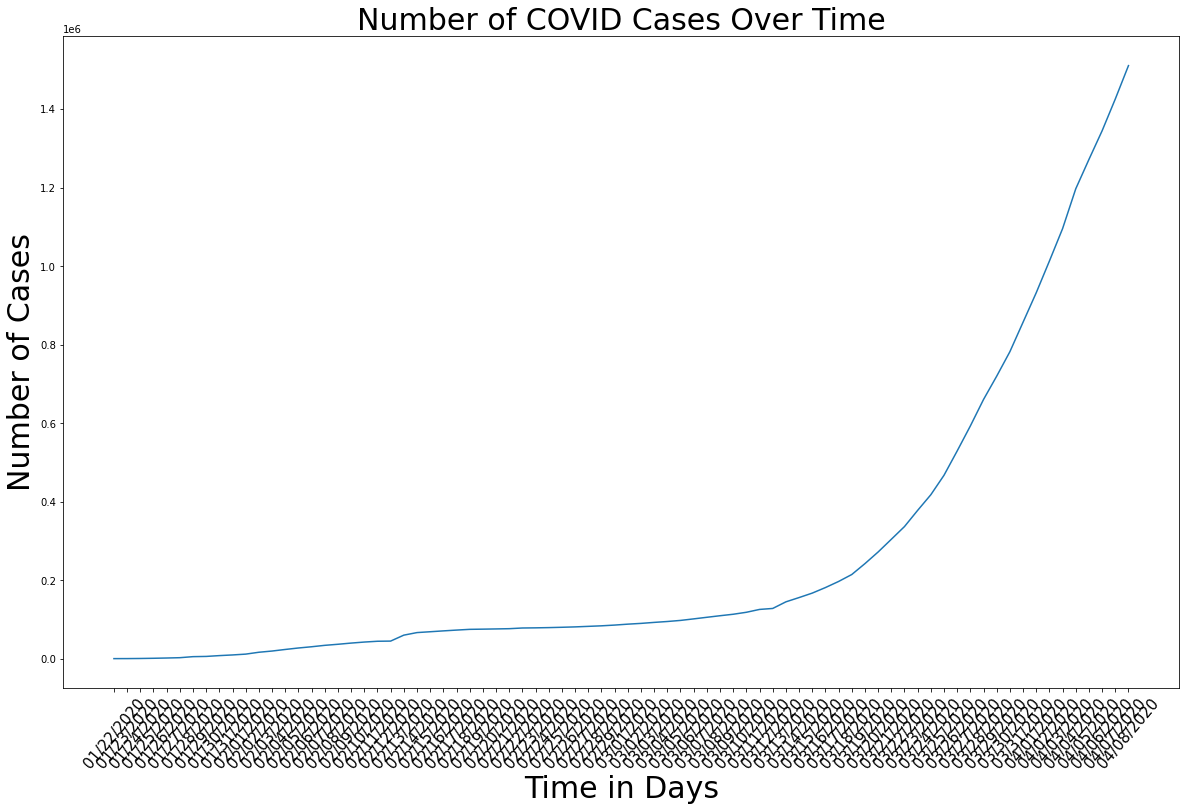

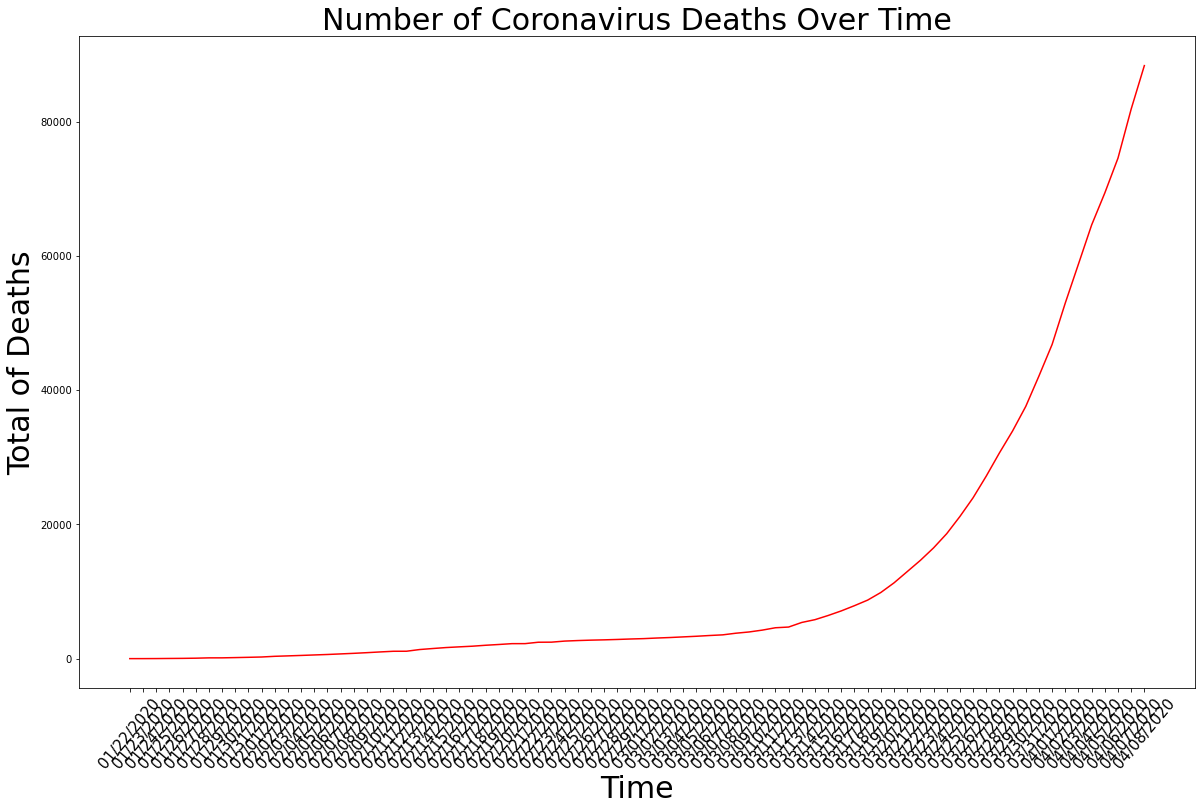

In [11]:
start_date = datetime.strptime(dates[0], '%m/%d/%y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + timedelta(days=i)).strftime('%m/%d/%Y'))
adjusted_dates = future_forcast_dates[:-3]


plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.title('Number of COVID Cases Over Time', size=30)
plt.xlabel('Time in Days', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(rotation=50, size=15)
plt.show()

plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_deaths, color='red')
plt.title('Number of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Total of Deaths', size=30)
plt.xticks(rotation=50, size=15)
plt.show()

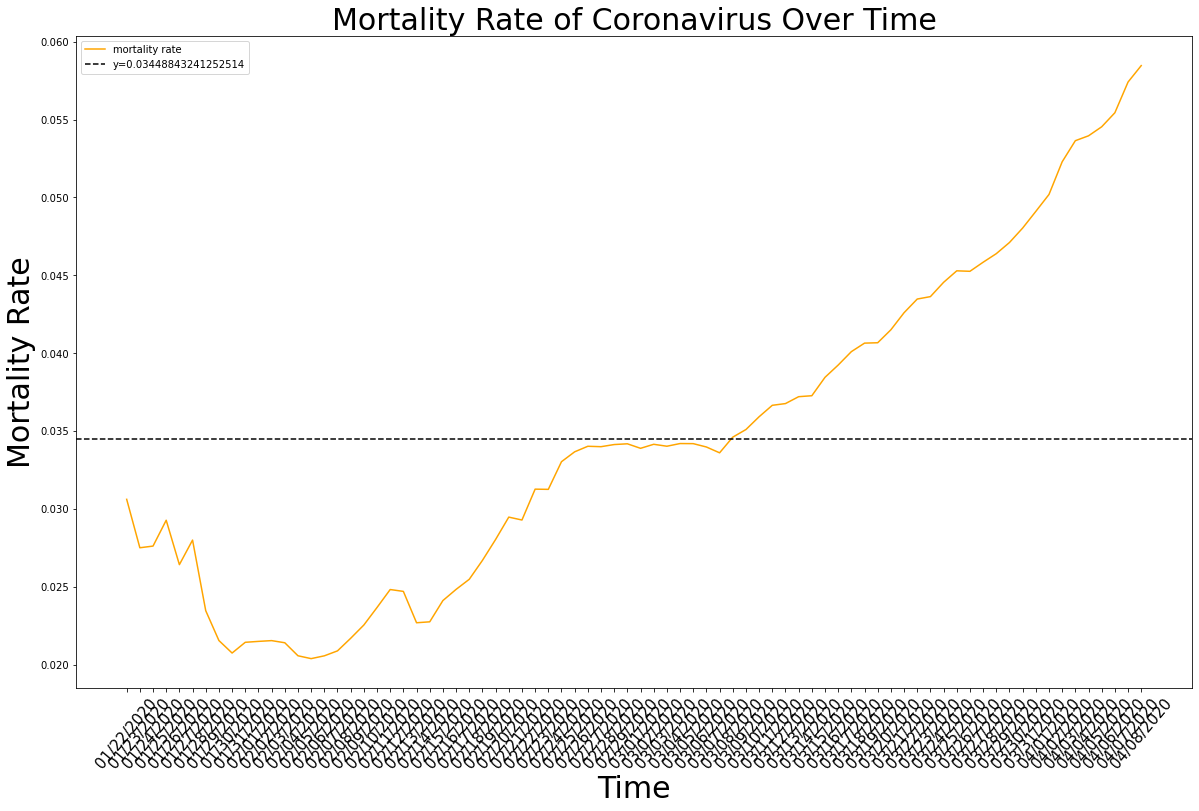

In [12]:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y=mean_mortality_rate, linestyle='--', color='black')
plt.title('Mortality Rate of Coronavirus Over Time', size=30)
plt.legend(['mortality rate', 'y=' + str(mean_mortality_rate)])
plt.xlabel('Time', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(rotation=50, size=15)
plt.show()

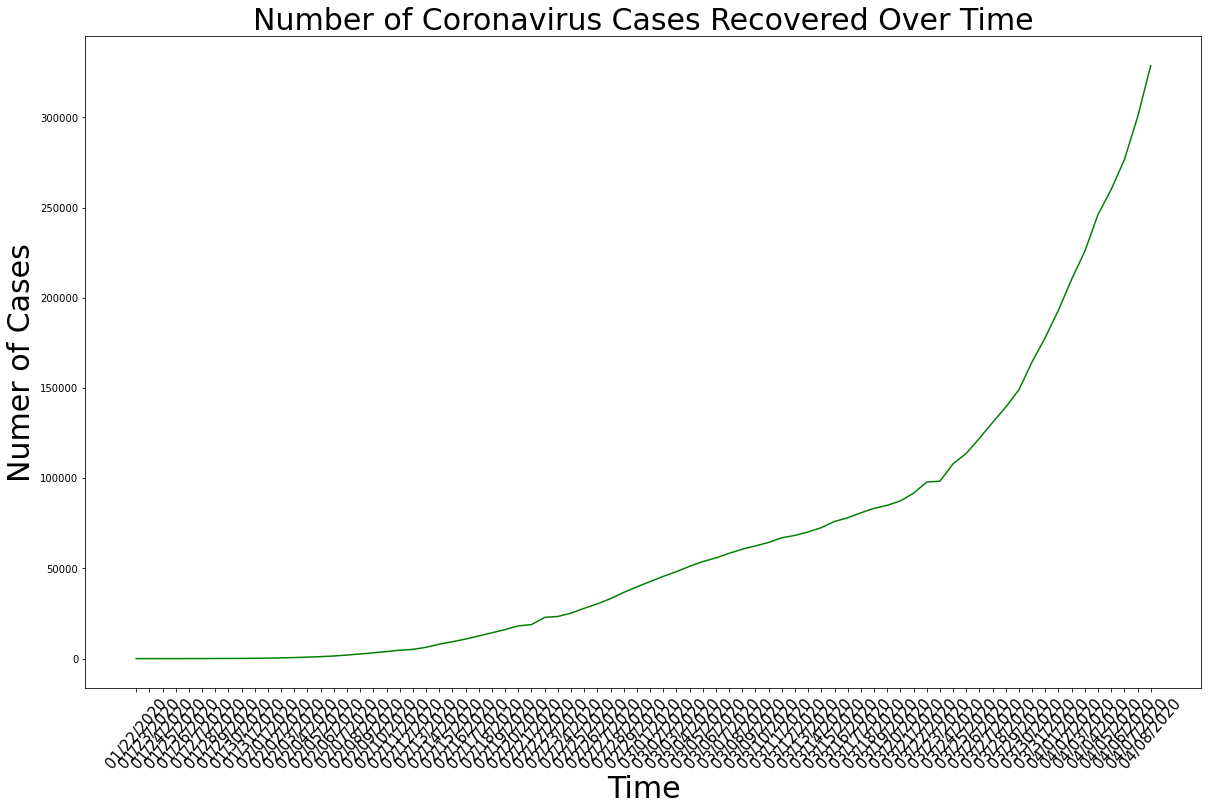

In [13]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_recovered, color='green')
plt.title('Number of Coronavirus Cases Recovered Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Numer of Cases', size=30)
plt.xticks(rotation=50, size=15)
plt.show()

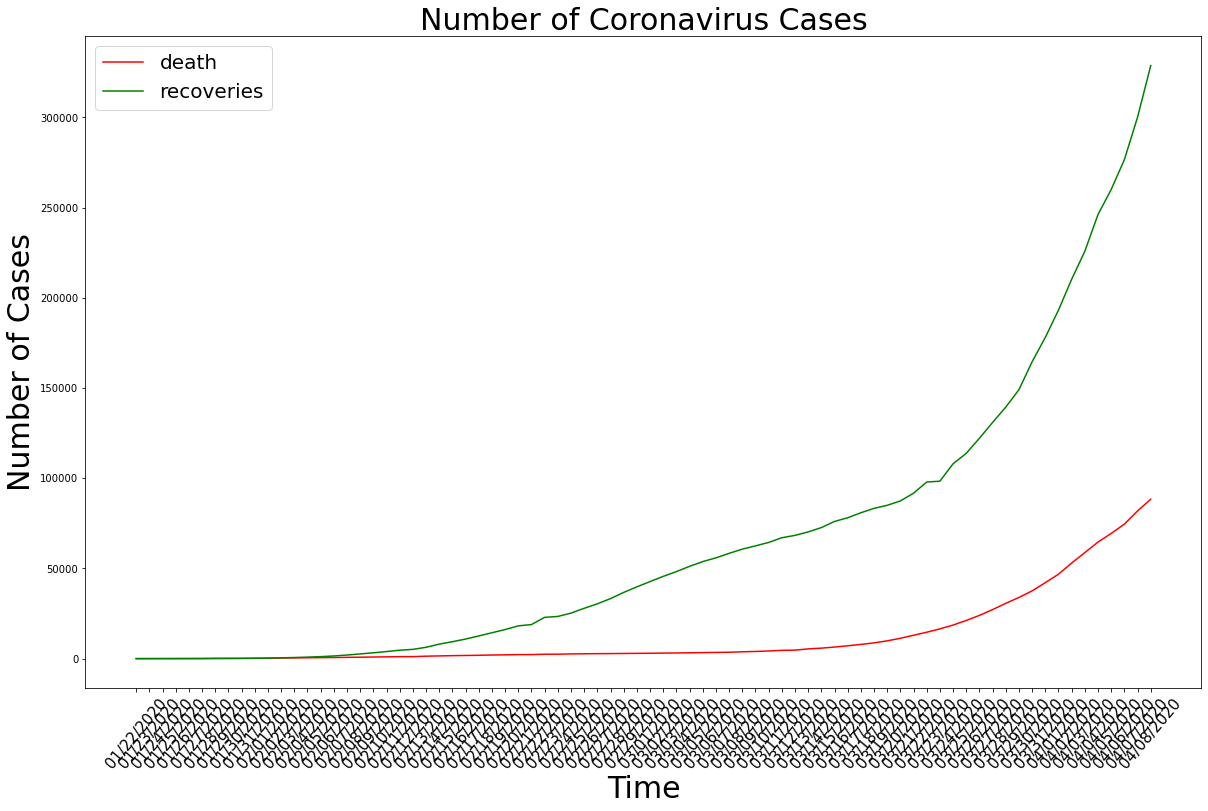

In [14]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_deaths, color='red')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['death', 'recoveries'], loc='best', fontsize=20)
plt.title('Number of Coronavirus Cases', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(rotation=50, size=15)
plt.show()

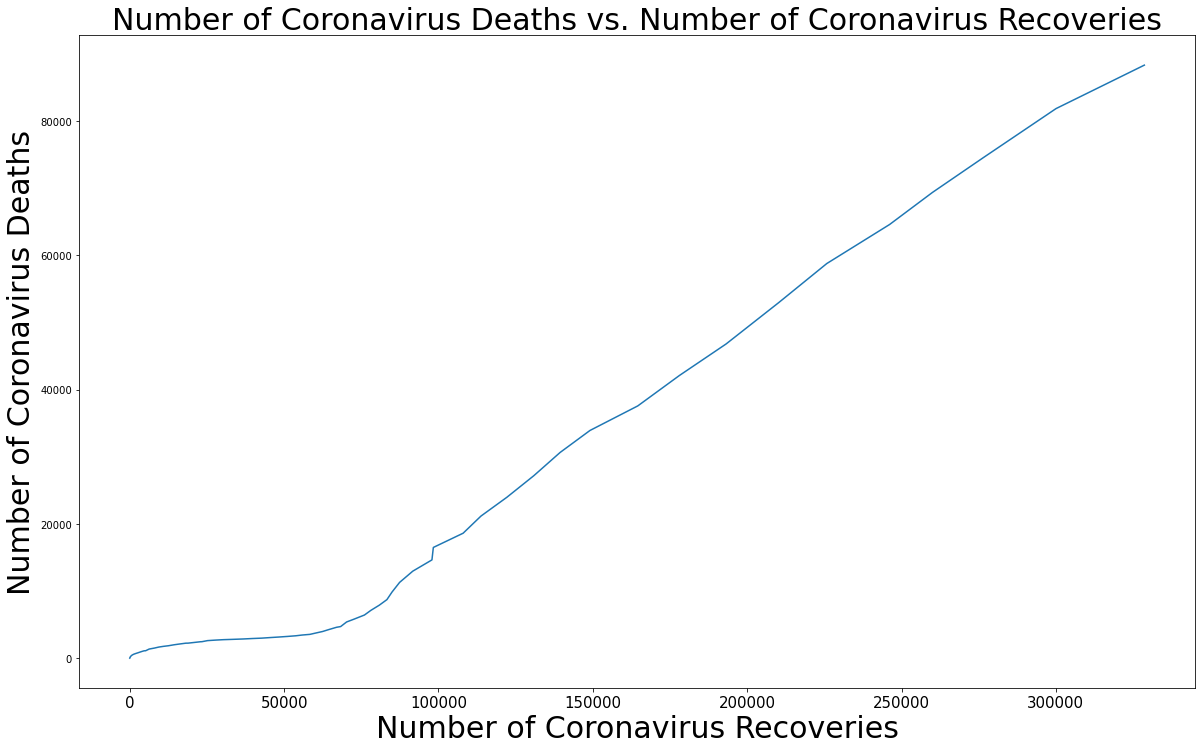

In [15]:
plt.figure(figsize=(20, 12))
plt.plot(total_recovered, total_deaths)
plt.title('Number of Coronavirus Deaths vs. Number of Coronavirus Recoveries', size=30)
plt.xlabel('Number of Coronavirus Recoveries', size=30)
plt.ylabel('Number of Coronavirus Deaths', size=30)
plt.xticks(size=15)
plt.show()

In [16]:
latest_confirmed = confirmed_df[dates[-1]]
latest_deaths = deaths_df[dates[-1]]
latest_recoveries = recovered_df[dates[-1]]

In [17]:
unique_countries = list(confirmed_df['Country/Region'].unique())

In [18]:
country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_df['Country/Region'] == i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)

for i in no_cases:
    unique_countries.remove(i)


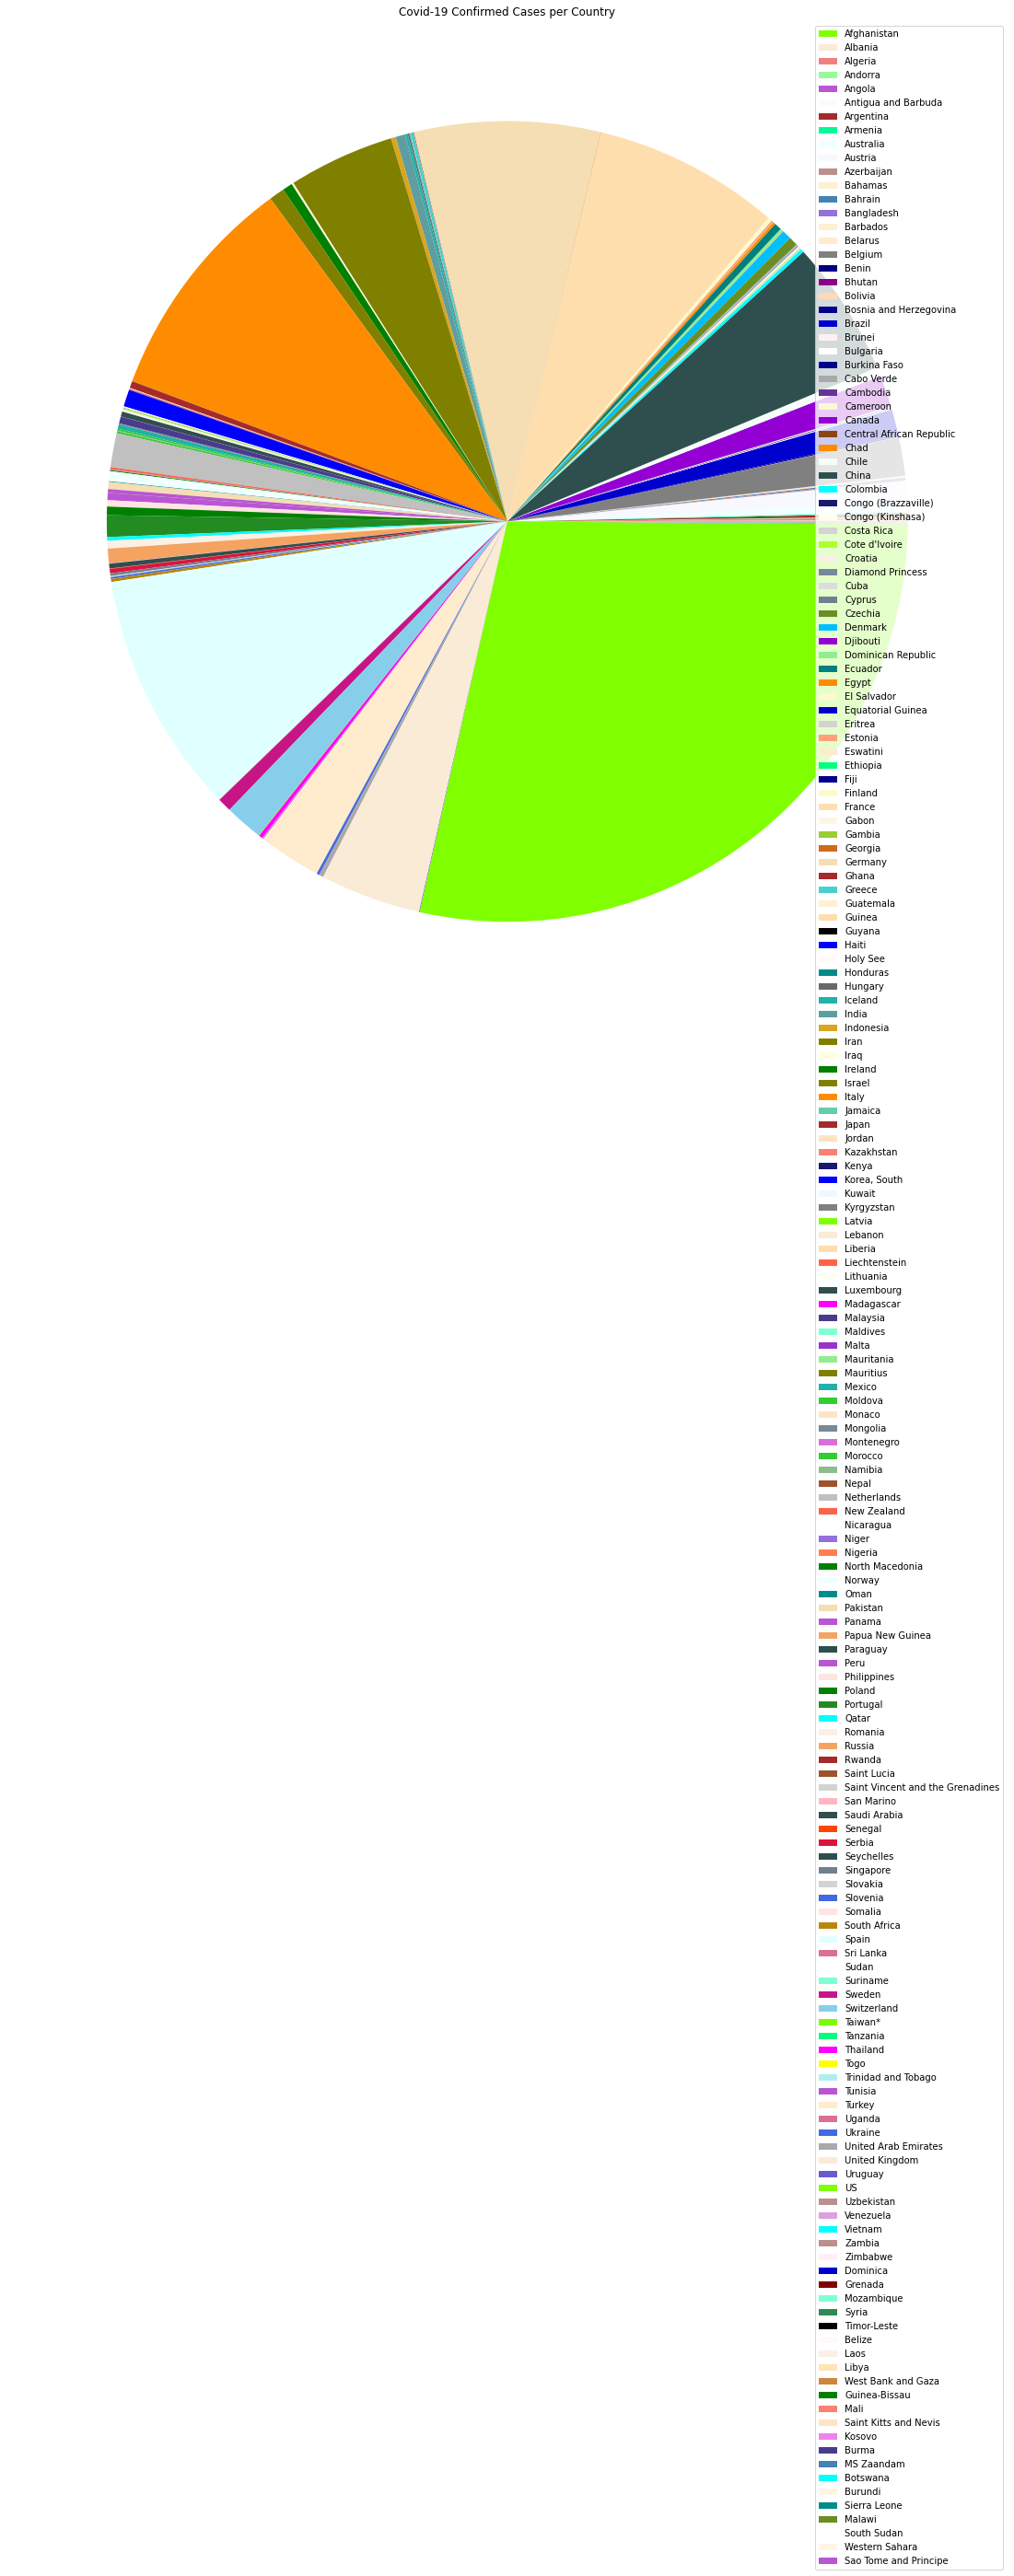

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.7s finished


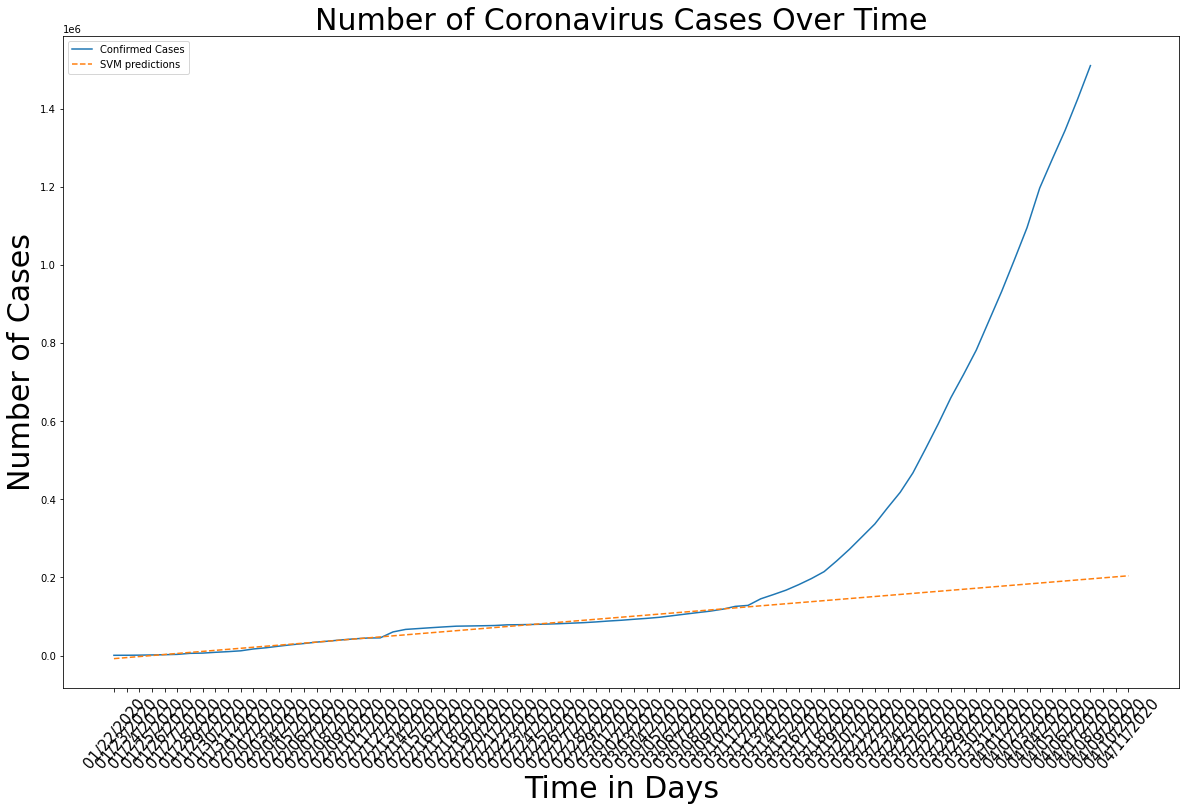

In [19]:
c = random.choices(list(mcolors.CSS4_COLORS.values()), k=len(unique_countries))
plt.figure(figsize=(20, 20))
plt.title('Covid-19 Confirmed Cases per Country')
plt.pie(country_confirmed_cases, colors=c)
plt.legend(unique_countries, loc='best')
plt.show()

X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22,
                                                                                            world_cases, test_size=0.2,
                                                                                            shuffle=False)

X_train_confirmed.shape, y_train_confirmed.shape, X_test_confirmed.shape, y_test_confirmed.shape

kernel = ['linear', 'rbf']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]
svm_grid = {'kernel': kernel, 'C': c, 'gamma': gamma, 'epsilon': epsilon, 'shrinking': shrinking}

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=5, return_train_score=True,
                                n_jobs=-1, n_iter=30, verbose=1)

svm_search.fit(X_train_confirmed, y_train_confirmed.ravel())

svm_confirmed = svm_search.best_estimator_
svm_pred = svm_confirmed.predict(future_forcast)
test_rfr_pred_svm = svm_confirmed.predict(X_test_confirmed)

plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast_dates, svm_pred, linestyle='dashed')
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Time in Days', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed Cases', 'SVM predictions'])
plt.xticks(rotation=50, size=15)
plt.show()

In [20]:
print('MAE SVM:', mean_absolute_error(test_rfr_pred_svm, y_test_confirmed))
print('MSE SVM:', mean_squared_error(test_rfr_pred_svm, y_test_confirmed))

MAE SVM: 750050.59375
MSE SVM: 671385332556.4277


# Instantiate RandomizedSearchCV model

In [21]:
X_train_confirmed_rfr, X_test_confirmed_rfr, y_train_confirmed_rfr, y_test_confirmed_rfr = train_test_split(days_data,
                                                                                            cases_data, test_size=0.1,
                                                                                            shuffle=False)

X_train_confirmed_rfr.shape, y_train_confirmed_rfr.shape, X_test_confirmed_rfr.shape, y_test_confirmed_rfr.shape

rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 7, 10],
           "max_features": [0.5, 1, "sqrt"] }
rfr_model_v2 = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                     random_state=42),
                               param_distributions=rf_grid,
                               n_iter=30,
                               cv=5,
                               verbose=True)

rfr_model_v2.fit(X_train_confirmed_rfr, y_train_confirmed_rfr.ravel())

test_rfr_pred = rfr_model_v2.predict(X_test_confirmed_rfr)
rfr_pred = rfr_model_v2.predict(future_forcast)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  1.0min finished


In [22]:
print('MAE RFR:1', mean_absolute_error(test_rfr_pred, y_test_confirmed_rfr))
print('MSE RFR 1:', mean_squared_error(test_rfr_pred, y_test_confirmed_rfr))

MAE RFR:1 1890.0942760621303
MSE RFR 1: 5443585.331706813


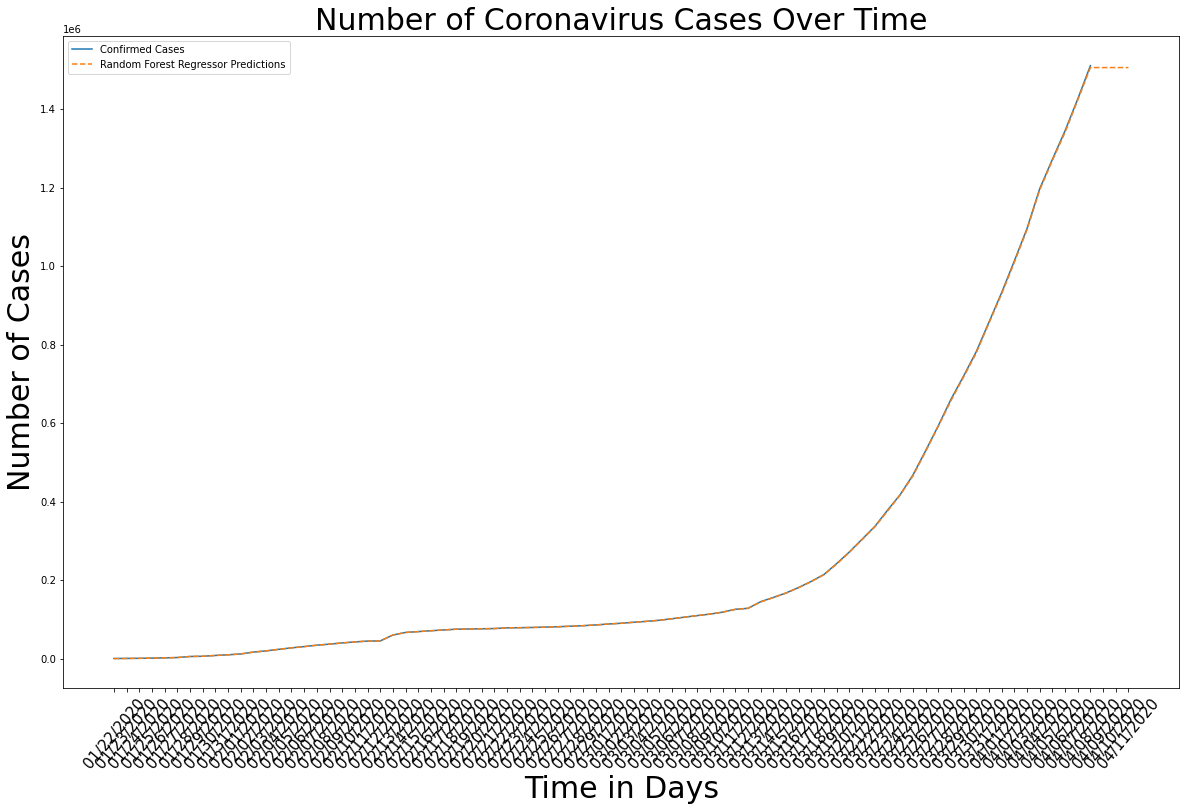

In [23]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast_dates, rfr_pred, linestyle='dashed')
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Time in Days', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed Cases', 'Random Forest Regressor Predictions'])
plt.xticks(rotation=50, size=15)
plt.show()

In [24]:
print('Random Forest Regessor prediction: ', set(zip(future_forcast_dates[-20:], rfr_pred[-20:])))

Random Forest Regessor prediction:  {('03/30/2020', 778954.5921052631), ('03/28/2020', 657058.6368421053), ('04/10/2020', 1506081.1921052632), ('03/24/2020', 416917.5763157895), ('03/31/2020', 854720.5894736842), ('03/27/2020', 591629.3486842106), ('04/05/2020', 1269357.9894736842), ('04/06/2020', 1340971.5289473685), ('04/04/2020', 1193862.5736842104), ('04/11/2020', 1506081.1921052632), ('04/03/2020', 1092948.522368421), ('04/01/2020', 929259.2210526316), ('04/02/2020', 1009718.9710526316), ('03/23/2020', 375899.3078947368), ('04/08/2020', 1506081.1921052632), ('04/09/2020', 1506081.1921052632), ('03/26/2020', 527071.5368421052), ('03/25/2020', 465221.2710526316), ('04/07/2020', 1423122.5342105264), ('03/29/2020', 717652.3631578947)}


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  1.0min finished


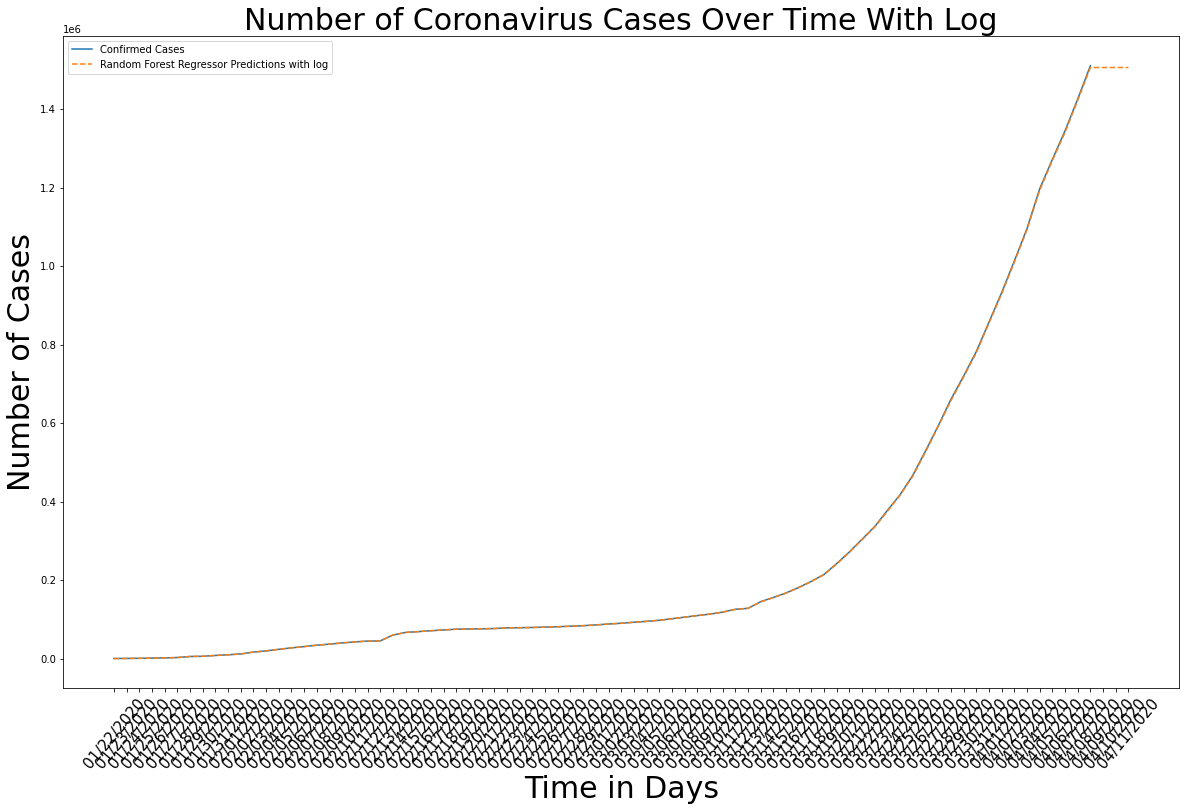

In [25]:
rf_grid2 = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 7, 10],
           "max_features": [0.5, 1, "log2"] }

rfr_model2_v2 = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                     random_state=42),
                               param_distributions=rf_grid,
                               n_iter=30,
                               cv=5,
                               verbose=True)

rfr_model2_v2.fit(X_train_confirmed_rfr, y_train_confirmed_rfr.ravel())

test_rfr_pred2 = rfr_model2_v2.predict(X_test_confirmed_rfr)
rfr_pred2 = rfr_model2_v2.predict(future_forcast)

plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast_dates, rfr_pred2, linestyle='dashed')
plt.title('Number of Coronavirus Cases Over Time With Log', size=30)
plt.xlabel('Time in Days', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed Cases', 'Random Forest Regressor Predictions with log'])
plt.xticks(rotation=50, size=15)
plt.show()

In [26]:
print('MAE RFR 2:', mean_absolute_error(test_rfr_pred2, y_test_confirmed_rfr))
print('MSE RFR 2:', mean_squared_error(test_rfr_pred2, y_test_confirmed_rfr))

MAE RFR 2: 1875.9247151286295
MSE RFR 2: 5329921.225906514
